In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv("F:/Oasis Infobyte_internship/Fraud Detection/creditcard.csv")

# Data Exploration
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 


Missing Values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


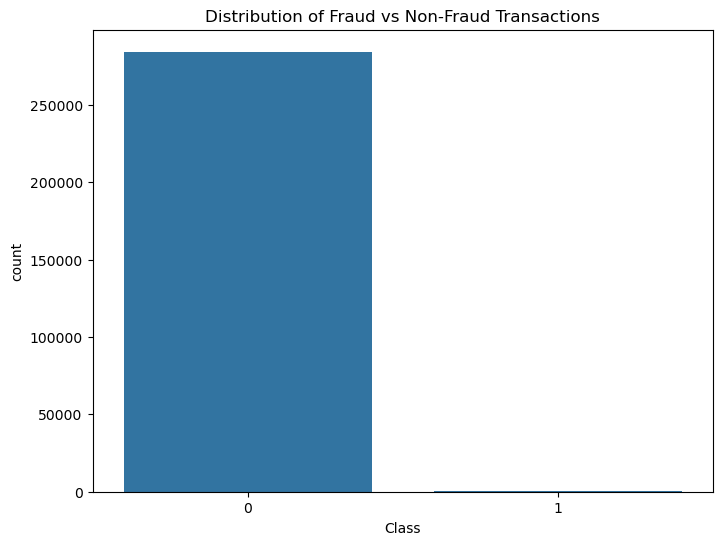

In [3]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())

# Visualize the distribution of classes
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

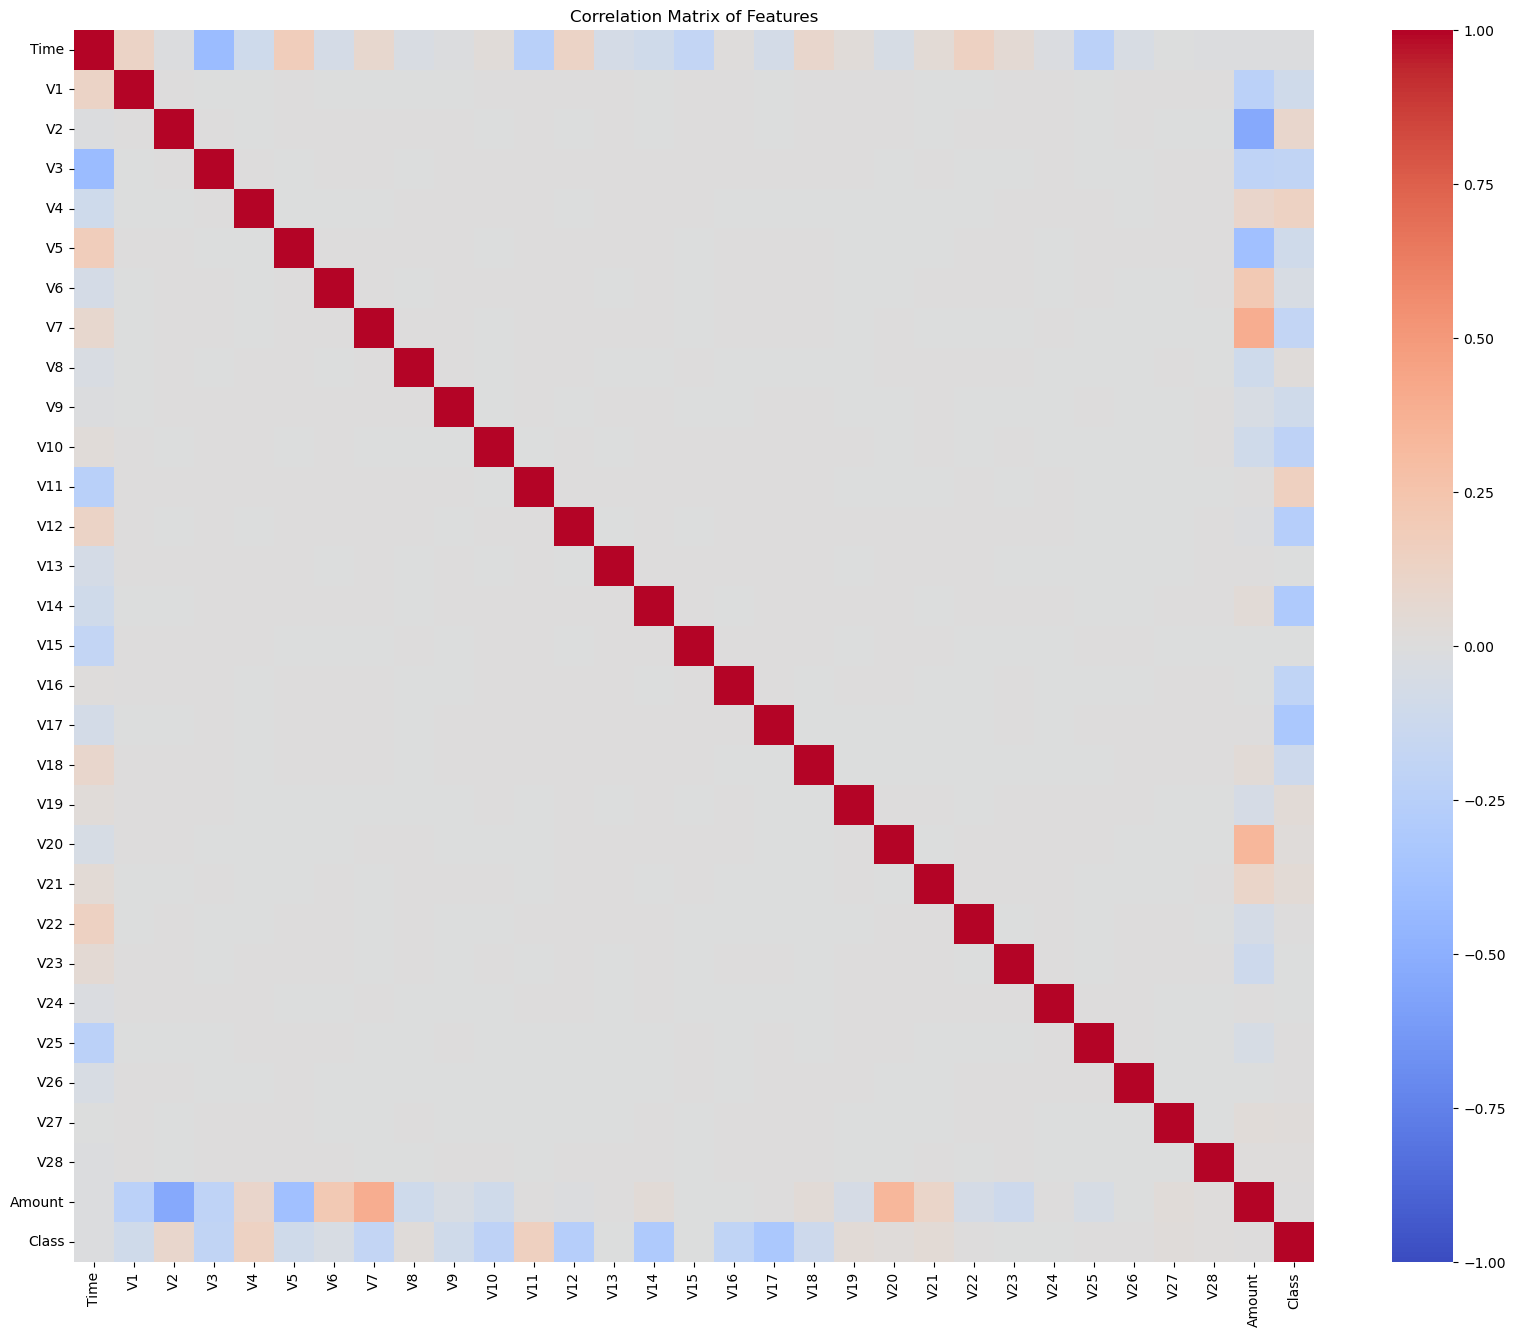

In [5]:
# Correlation matrix (for numerical features)
plt.figure(figsize=(20, 16))
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Features')
plt.show()

In [9]:
# Prepare data for modeling
X = df.drop(['Time', 'Class'], axis=1)  # Features (excluding Time and Class)
y = df['Class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features (important for logistic regression and distance-based algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    
    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
    # Plot Precision-Recall curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_prob)
    plt.figure(figsize=(8, 6))
    plt.plot(recall_curve, precision_curve, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'avg_precision': avg_precision
    }


Logistic Regression:
Confusion Matrix:
[[55342  1522]
 [    8    90]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.98     56962

Accuracy: 0.9731
Precision: 0.0558
Recall: 0.9184
F1 Score: 0.1053
ROC AUC: 0.9707
Average Precision: 0.7223


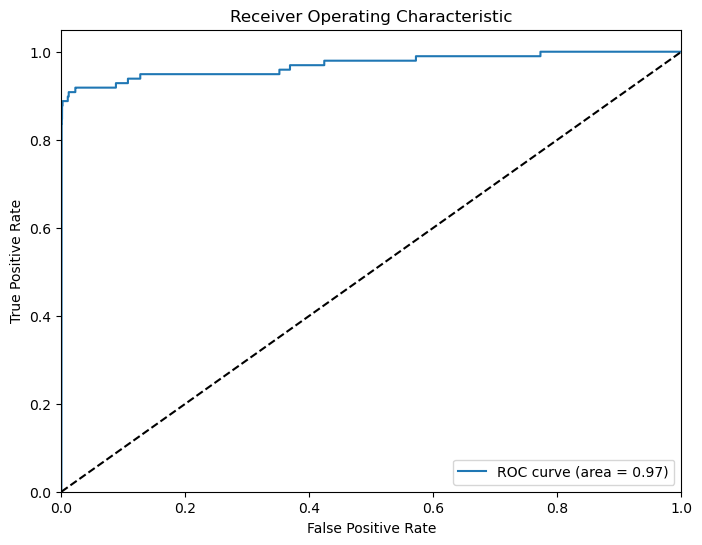

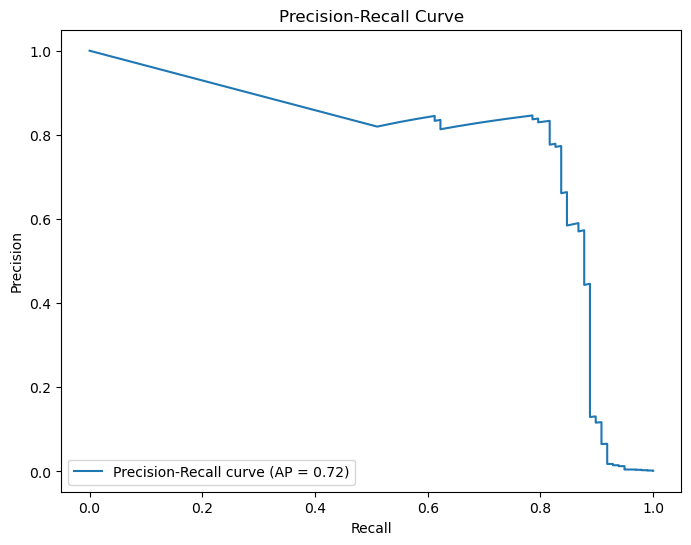


Decision Tree:
Confusion Matrix:
[[56737   127]
 [   23    75]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.77      0.50        98

    accuracy                           1.00     56962
   macro avg       0.69      0.88      0.75     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9974
Precision: 0.3713
Recall: 0.7653
F1 Score: 0.5000
ROC AUC: 0.8815
Average Precision: 0.2846


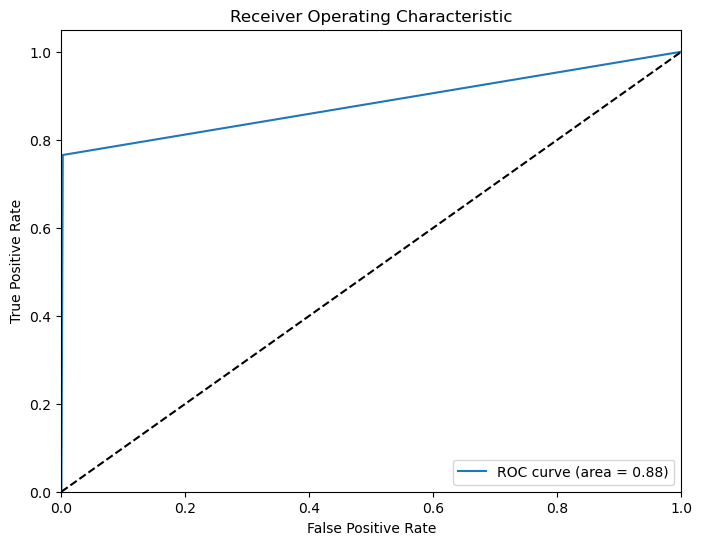

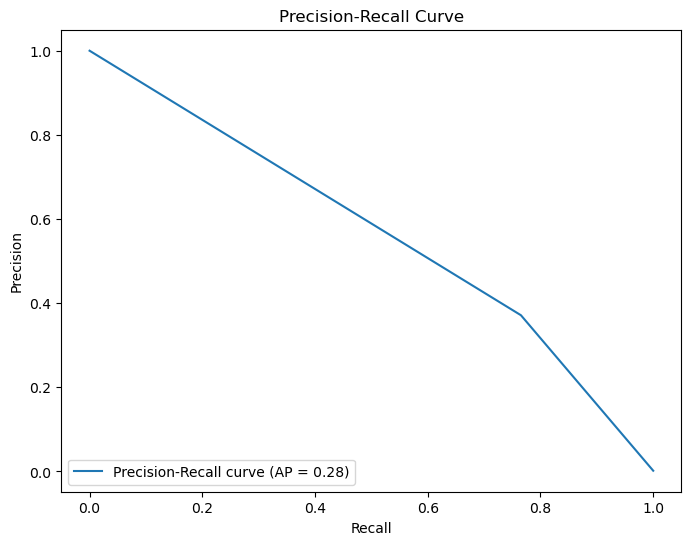


Random Forest:
Confusion Matrix:
[[56848    16]
 [   18    80]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.82      0.82        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy: 0.9994
Precision: 0.8333
Recall: 0.8163
F1 Score: 0.8247
ROC AUC: 0.9681
Average Precision: 0.8651


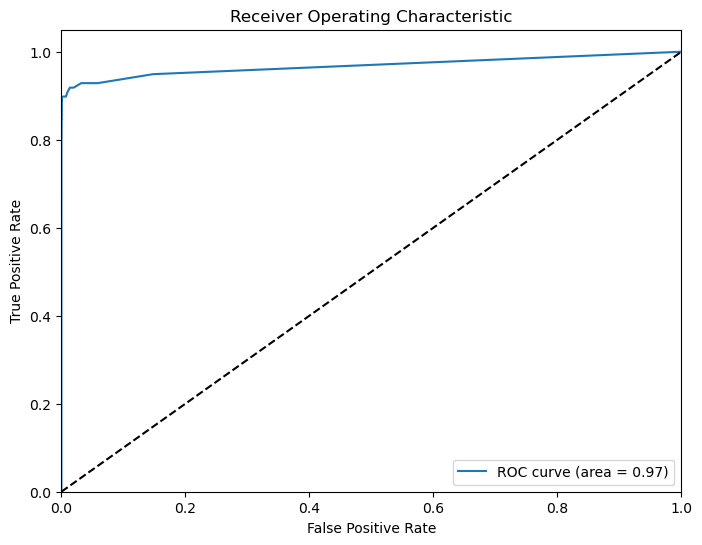

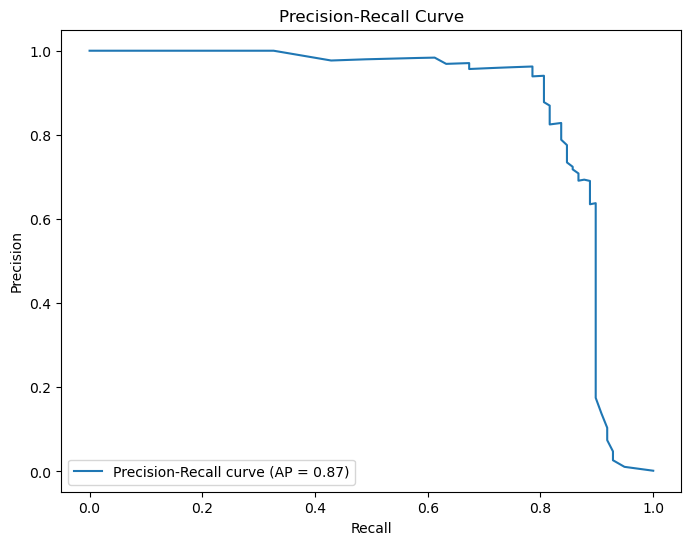

<Figure size 1200x800 with 0 Axes>

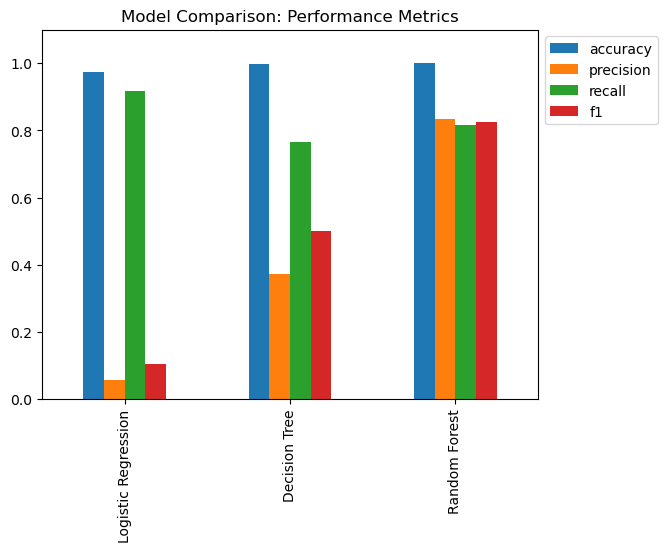

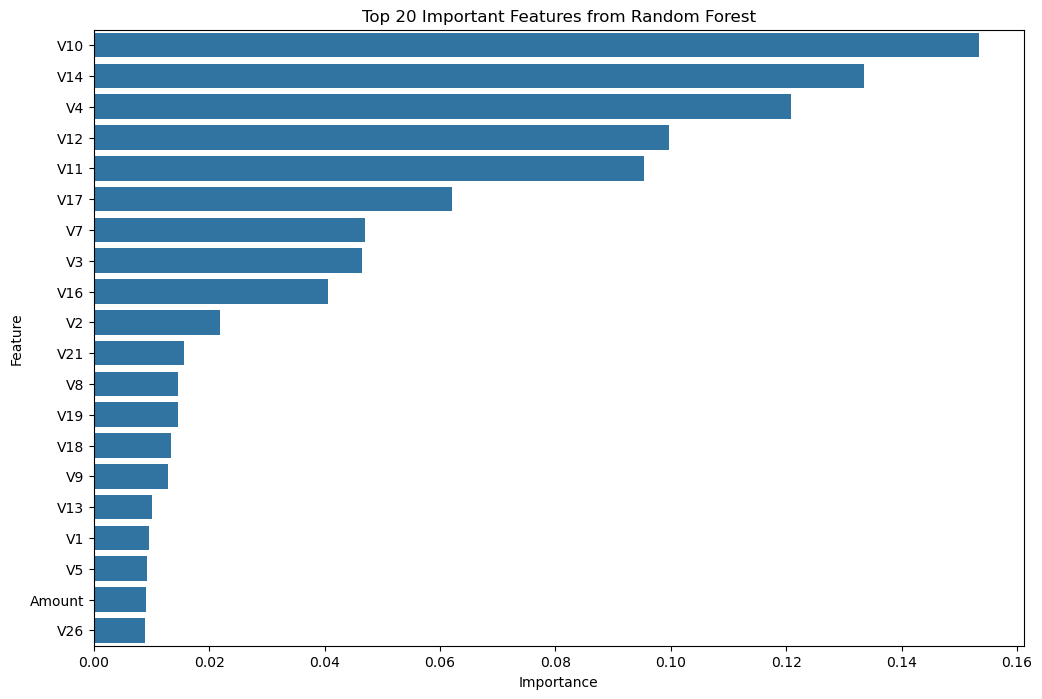

In [11]:
# Handle class imbalance using SMOTE (oversampling) and RandomUnderSampler (undersampling)
resampling = Pipeline([
    ('oversample', SMOTE(random_state=42)),
    ('undersample', RandomUnderSampler(random_state=42))
])

X_train_resampled, y_train_resampled = resampling.fit_resample(X_train, y_train)

# Model 1: Logistic Regression
print("\nLogistic Regression:")
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_resampled, y_train_resampled)
lr_metrics = evaluate_model(lr, X_test, y_test)

# Model 2: Decision Tree
print("\nDecision Tree:")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_resampled, y_train_resampled)
dt_metrics = evaluate_model(dt, X_test, y_test)

# Model 3: Random Forest
print("\nRandom Forest:")
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
rf_metrics = evaluate_model(rf, X_test, y_test)

# Compare model performances
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
metrics_df = pd.DataFrame([lr_metrics, dt_metrics, rf_metrics], index=models)

# Plot comparison of model metrics
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', y=['accuracy', 'precision', 'recall', 'f1'], 
                title='Model Comparison: Performance Metrics', 
                ylim=(0, 1.1))
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Feature Importance from Random Forest
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title('Top 20 Important Features from Random Forest')
plt.show()

